#### DADOS

In [1]:
from igraph import *

V = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10'}

E = {
     0: [2, 3], 
     1: [8],
     2: [8, 3, 0],
     3: [8, 0, 2],
     4: [9, 7, 10],
     5: [6, 9],
     6: [5, 9],
     7: [4, 10],
     8: [1, 10, 2, 3],
     9: [5, 6, 4],
    10: [4, 7, 8],
}

g = Graph()

#### TRATAMENTO DOS VÉRTICES

In [2]:
tags_dos_verteces=[]

for x in V:
    tags_dos_verteces.append(V[x])

g.add_vertices(len(V))      #numeros de Verteces

#### TRATAMENTO DAS ARESTAS

In [3]:
arestas=[]

for x in E:
    for y in E[x]:
        if not((y,x) in arestas):
            arestas.append((x,y))

g.add_edges(arestas)   #arestas

#### Algoritmo para encontrar pontes em um grafo conexo

In [4]:
ans = []
time_s = 1
visit = [0] * len(E)

def dfs(u, pai):
    global time_s, visit, ans
    time_s += 1
    visit[u] = time_s
    menor = time_s
    filhos = 0
    for i in range(0, len(E[u])):
        if visit[E[u][i]] == 0:
            filhos += 1
            m = dfs(E[u][i], u)
            menor = min(menor, m)
            if visit[u] < m:
                 ans.append((u, E[u][i]))
        elif E[u][i] != pai:
            menor = min(menor, visit[E[u][i]])    
    return menor

def get_articulacoes():
    dfs(0, -1)

    
get_articulacoes()


arestas_pontes = []
for v in ans:
    if v[0] > v[1]:
        arestas_pontes.append((v[1], v[0]))
    else:
        arestas_pontes.append(v)

#### TRATAMENTO DAS CORES

In [5]:
#usar arestas na ordem
cores_nas_arestas = []
cores=['black', 'red']

for a in arestas:
    if a in arestas_pontes:
        cores_nas_arestas.append(cores[1])
    else:
        cores_nas_arestas.append(cores[0])

#### PLOTANDO O GRAFO

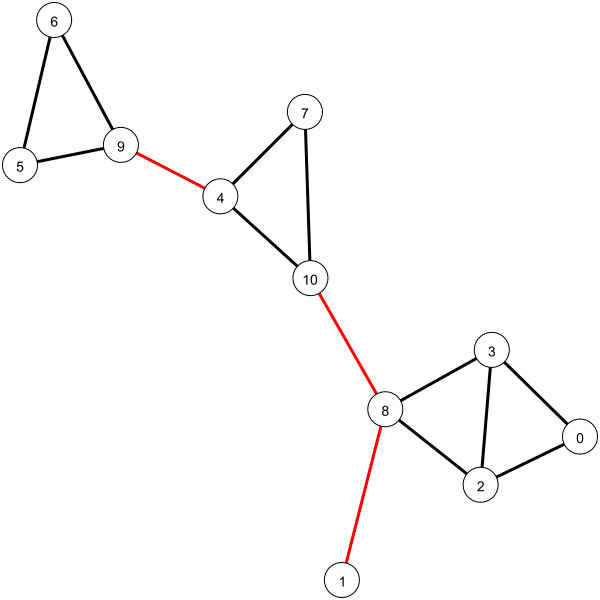

In [6]:
plot(g, 
     vertex_size=35, 
     vertex_color=['white'], 
     vertex_label=tags_dos_verteces,  
     edge_width=[3], 
     edge_color=cores_nas_arestas
    )